# ANALYSIS OF MATH SCORE BASED ON GENDER, COUNTRY and DISCIPLINE

#### **_by Mehdi Iddar_**

## Investigation Overview

In this investigation, I wanted to take a closer a look at explicative variables as gender, country, and attitudes of students in class (noise and disporder, student don't listen, students don't work well, students start working late, teacher has to wail until its quiet) affect the math scores. 


## Dataset Overview

The original PISA 2012 dataset contained information from 485490 observations and 636 variables. After our data cleaning process, we condensed the number of variables to 9 : <br>
- student id, country, gender, age, discipline, discipline level, math score, reading score, science score <br>

All metrics under discipline have a scale of 4 levels :
- Never or hardly ever, Some lessons, Most lesons, Every lesson

In [28]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [29]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa_clean.csv')

## Math score distribution by gender

According to the visualization :
- both Male score and Female score histograms are normally distributed.
- The Males students consistently score better than the Female students in Math.

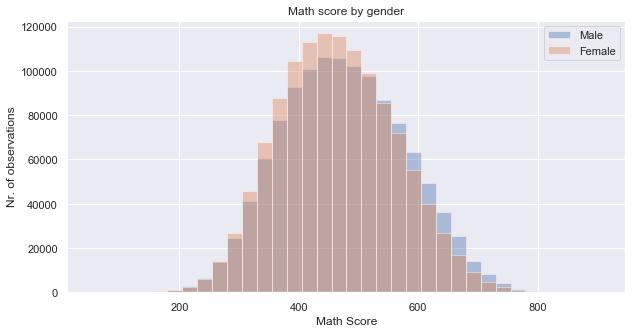

In [30]:
plt.figure(figsize = [10, 5])
binsize=25
bins=np.arange(min(df['math score']),max(df['math score'])+binsize, binsize)
plt.title('Math score by gender')
plt.xlabel('Math Score')
plt.ylabel('Nr. of observations')
plt.hist(data=df.query('gender=="Male"'),x='math score', alpha=.4,bins=bins, label='Male')
plt.hist(data=df.query('gender=="Female"'),x='math score', alpha=.4,bins=bins,label='Female')
plt.legend();

## Top 10 Country ranking by average score in maths

According to the visualization : <br>
- China_Shanghai has the highest math average score (above 600). 
- The three pole positions are occupied by : China_Shanghai, Singapore, Honk_Kong

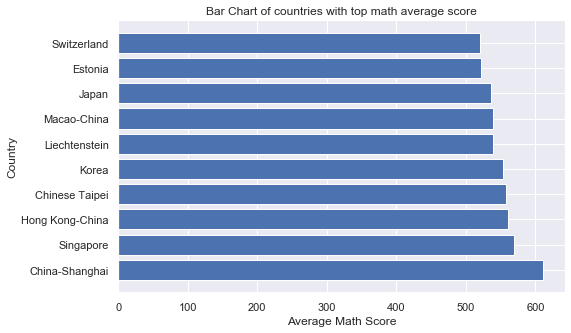

In [31]:
# calculate average math score, sort scores and select top 10
country_math = df[['country' , 'math score']]
country_math = country_math.groupby('country').sum()/country_math.groupby('country').count()
country_math = country_math.sort_values('math score', ascending = False)[0:10]
country_math = country_math.reset_index()
# Bar graph of top math scores by country 
plt.figure(figsize=(8, 5))
plt.barh(range(len(country_math.country)), country_math['math score']) 
plt.yticks(range(len(country_math.country)),country_math.country)
plt.xlabel('Average Math Score')
plt.ylabel('Country')
plt.title('Bar Chart of countries with top math average score');

## Math Scores Distribution by Discipline Metrics and Levels

Discipline conditions in a classroom have an effect on the score.<br>
For all discipline metrics, when discipline level is high 'never or hardly ever' math scores are high. the less the level of discipline is the less is the math score. 


In [32]:
# set order for categorical variable
df['discipline level'] = df['discipline level'].astype('category')
df['discipline level'].cat.reorder_categories(['Never or Hardly Ever',
                                               'Some Lessons', 'Most Lessons', 'Every Lesson'], inplace=True)

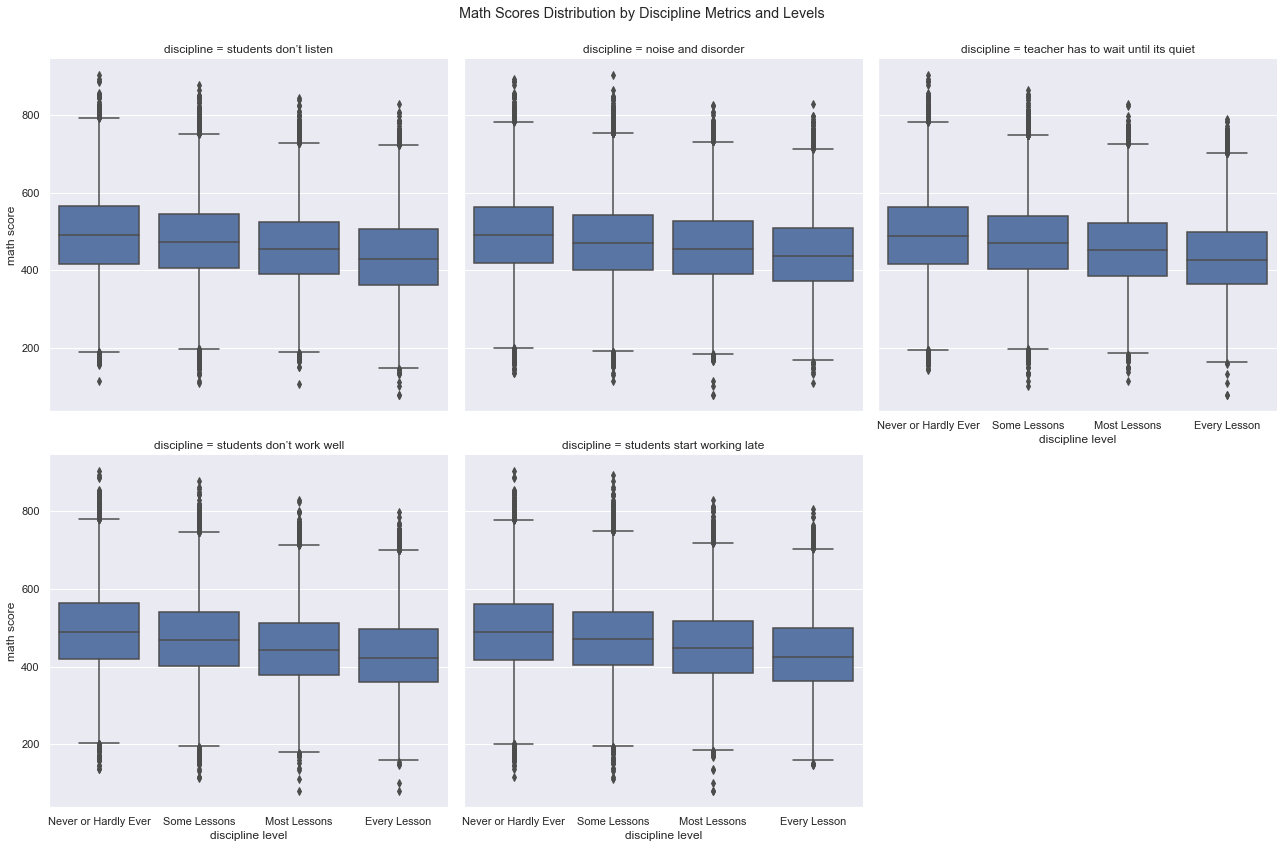

In [33]:
g = sns.FacetGrid(data = df , col = 'discipline', size = 6, col_wrap = 3, margin_titles = True)
g.map(sns.boxplot, 'discipline level', 'math score')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Math Scores Distribution by Discipline Metrics and Levels');